In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate , cross_val_score




In [2]:
#Universlbank .csv

df = pd.read_csv('UniversalBank.csv')
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
df.shape

(5000, 14)

In [4]:
df.keys()

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'PersonalLoan', 'SecuritiesAccount',
       'CDAccount', 'Online', 'CreditCard'],
      dtype='object')

In [5]:
X = df.drop(['ID','ZIPCode','PersonalLoan'],axis=1)
X.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1


In [6]:
y = df['PersonalLoan']
np.bincount(y)

array([4520,  480], dtype=int64)

In [7]:
X['Education']=X['Education'].replace([1,2,3],['Under','Grad','Prof'])
X.head()



,Age,Experience,Income,Family,CCAvg,Education,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard
0,25,1,49,4,1.6,Under,0,1,0,0,0
1,45,19,34,3,1.5,Under,0,1,0,0,0
2,39,15,11,1,1.0,Under,0,0,0,0,0
3,35,9,100,1,2.7,Grad,0,0,0,0,0
4,35,8,45,4,1.0,Grad,0,0,0,0,1


In [8]:
X.keys()



Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'SecuritiesAccount', 'CDAccount', 'Online', 'CreditCard'],
      dtype='object')

In [9]:
X = pd.get_dummies(X[['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'SecuritiesAccount', 'CDAccount', 'Online', 'CreditCard']],
                  columns=['Education'],
                  drop_first=True)

X.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard,Education_Prof,Education_Under
0,25,1,49,4,1.6,0,1,0,0,0,0,1
1,45,19,34,3,1.5,0,1,0,0,0,0,1
2,39,15,11,1,1.0,0,0,0,0,0,0,1
3,35,9,100,1,2.7,0,0,0,0,0,0,0
4,35,8,45,4,1.0,0,0,0,0,1,0,0


In [10]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: PersonalLoan, dtype: int64

In [11]:
# 훈련/검증용 데이터 분할 
X_train, X_test, y_train, y_test= train_test_split(X,y,
                                                  test_size=0.3,random_state=999,stratify =y)

In [12]:
tree = DecisionTreeClassifier(criterion='entropy',random_state=999)
forest = RandomForestClassifier(criterion='gini',n_estimators=500,
                               random_state=999)

model_label=['DecisionTree','RandomForest']
modelList = [tree, forest]
modelList

[DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False, random_state=999,
             splitter='best'),
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
             oob_score=False, random_state=999, verbose=0, warm_start=False)]

In [13]:
# 안개무덤, 에리타 , 먹이 , 우리는 요정, 결혼생활그림일기, 현혹,호랑,

In [14]:
tree.fit(X_train,y_train)
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=999, verbose=0, warm_start=False)

In [15]:
for m, label in zip(modelList,model_label):
    scores = cross_val_score(estimator=m,X=X_train,y=y_train,cv=10,scoring='roc_auc')
    print('ROC - AUC %0.2f (+/- %0.2f), [%s]'%(scores.mean(), scores.std(),label))

ROC - AUC 0.94 (+/- 0.02), [DecisionTree]
ROC - AUC 1.00 (+/- 0.00), [RandomForest]


In [16]:
for m, label in zip(modelList,model_label):
    scores = cross_val_score(estimator=m,X=X_test,y=y_test,cv=10,scoring='roc_auc')
    print('ROC - AUC %0.2f (+/- %0.2f), [%s]'%(scores.mean(), scores.std(),label))

ROC - AUC 0.93 (+/- 0.03), [DecisionTree]
ROC - AUC 0.99 (+/- 0.01), [RandomForest]


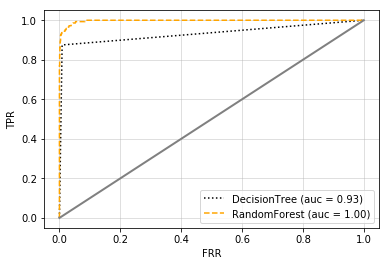

In [17]:
from sklearn.metrics import roc_curve ,auc
colors = ['black','orange','red','blue']
linestyles = [":","--",'-','~']


for m , label , c ,ltype in zip( modelList , model_label,colors , linestyles):
    m.fit(X_train,y_train)
    y_pred = m.predict_proba(X_test)[:,1]
    fpr, tpr ,thresholds = roc_curve(y_true = y_test,y_score =y_pred)
    
    roc_auc = auc(x=fpr,y=tpr)
    plt.plot(fpr,tpr,color = c , linestyle = ltype,
             label = '%s (auc = %0.2f)'%(label,roc_auc))
    
    
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],linestyle ='-',color ='gray',linewidth=2)

plt.grid(alpha=0.5)
plt.xlabel('FRR')
plt.ylabel('TPR')

plt.show()



In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score ,f1_score
#confuse matrix 
forest.fit(X_train,y_train)

y_pred = forest.predict(X_test)

conMat = pd.DataFrame(confusion_matrix(y_test,y_pred),
                          index=['True[0]','True[1]'],
                              columns = ['Predcit[0]','Predict[1]'])

                                         
conMat 
#정확도 , precision , recall , f1 




,Predcit[0],Predict[1]
True[0],1353,3
True[1],18,126


In [19]:
print('잘못된 샘플수 : %d'%(y_test!=y_pred).sum())
print('정확도 : %.2f'%(accuracy_score(y_test,y_pred)))
print('정밀도 : %.2f'%(precision_score(y_test,y_pred)))
print('재현율 : %.2f'%(recall_score(y_test,y_pred)))
print('f1-score : %.2f'%(f1_score(y_test,y_pred)))

잘못된 샘플수 : 21
정확도 : 0.99
정밀도 : 0.98
재현율 : 0.88
f1-score : 0.92


In [20]:
feet_labels = X.columns

 1) Mortgage                       0.036413
 2) Family                         0.105072
 3) Income                         0.359991
 4) Experience                     0.036359
 5) Education_Prof                 0.034225
 6) SecuritiesAccount              0.004180
 7) Education_Under                0.147186
 8) CCAvg                          0.173764
 9) Online                         0.007107
10) Age                            0.038036
11) CDAccount                      0.049320
12) CreditCard                     0.008348


NameError: name 'indices' is not defined

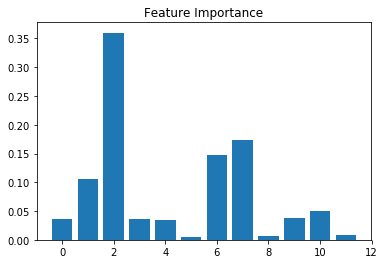

In [22]:
importances = forest.feature_importances_
lindices = np.argsort(importances[::-1])

for f in range(X_train.shape[1]):
    print('%2d) %-*s %f'%(f+1 ,30,feet_labels[lindices[f]],
                      importances[lindices[f]]))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]),importances[lindices],align='center')
plt.xticks(range(X_train.shape[1]), feet_labels[indices],rotation=90)
plt.tight_layout()
plt.show()

In [23]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest, threshold =0.1 , prefit = True)

In [24]:
X_selected = sfm.transform(X_train)
print('이 임계 조건을 만족하는 샘플의 수 : ' , X_selected.shape[1])

이 임계 조건을 만족하는 샘플의 수 :  4


In [25]:
# iris 데이터를 가지고 RandomForest 
from sklearn.datasets import load_iris
iris = load_iris()
iris.keys()

dict_keys(['target', 'DESCR', 'target_names', 'data', 'filename', 'feature_names'])

In [26]:
X = iris['data']


In [27]:
y = iris['target']

In [28]:
X_train, X_test, y_train, y_test= train_test_split(X,y,
                                                  test_size=0.3,random_state=999,stratify =y)

In [29]:
forest = RandomForestClassifier(criterion='gini',n_estimators=500,
                               random_state=999)


In [30]:
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=999, verbose=0, warm_start=False)

In [31]:
forest.score(X_train,y_train)

1.0

In [32]:
forest.score(X_test,y_test)

0.9111111111111111

In [33]:
y_test.shape

(45,)

In [202]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score ,f1_score
#confuse matrix 
# forest.fit(X_train,y_train)
y_pred = forest.predict(X_test)
conMat = pd.DataFrame(confusion_matrix(y_test,y_pred),
                          index=['setosa','versicolor','virginica'],
                              columns = ['setosa','versicolor','virginica'])                                         
conMat 
#정확도 , precision , recall , f1 

,setosa,versicolor,virginica
setosa,15,0,0
versicolor,0,15,0
virginica,0,4,11


In [203]:
print('잘못된 샘플수 : %d'%(y_test!=y_pred).sum())
print('정확도 : %.2f'%(accuracy_score(y_test,y_pred)))
# print('정밀도 : %.2f'%(precision_score(y_test,y_pred)))
# print('재현율 : %.2f'%(recall_score(y_test,y_pred)))
# print('f1-score : %.2f'%(f1_score(y_test,y_pred)))

잘못된 샘플수 : 4
정확도 : 0.91
